## ANÁLISIS EDA

El primer análisis se realiza sobre el CSV completo.

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [200]:
df= pd.read_csv('../data/quejas-clientes.csv', index_col=0)

In [201]:
df = df.drop_duplicates()

El dataset está limpio en duplicados.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28156 entries, 0 to 28155
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Complaint ID          28156 non-null  int64  
 1   Product               28156 non-null  object 
 2   Sub-product           17582 non-null  object 
 3   Issue                 28154 non-null  object 
 4   Sub-issue             13211 non-null  object 
 5   State                 27735 non-null  object 
 6   ZIP code              27876 non-null  float64
 7   Date received         28156 non-null  object 
 8   Date sent to company  28156 non-null  object 
 9   Company               28156 non-null  object 
 10  Company response      28156 non-null  object 
 11  Timely response?      28156 non-null  object 
 12  Consumer disputed?    6006 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 3.0+ MB


In [203]:
#Cambio a fechas de los campos.
df['Date received']=pd.to_datetime(df['Date received'], errors='coerce')
df['Date sent to company']=pd.to_datetime(df['Date sent to company'], errors='coerce')

In [204]:
df.isna().any()

Complaint ID            False
Product                 False
Sub-product              True
Issue                    True
Sub-issue                True
State                    True
ZIP code                 True
Date received           False
Date sent to company    False
Company                 False
Company response        False
Timely response?        False
Consumer disputed?       True
dtype: bool

### Exploración de datos del dataframe.

Antes de realizar cambios, vamos a explorar el dataframe sin cambios para ver que información nos puede aportar.


<Axes: title={'center': 'Quejas por producto'}, ylabel='Product'>

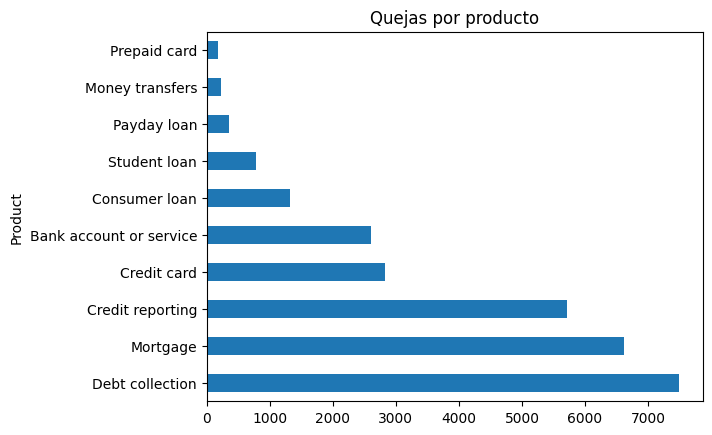

In [205]:
# Por producto.

df['Product'].value_counts().head(10).plot(kind='barh', title="Quejas por producto")

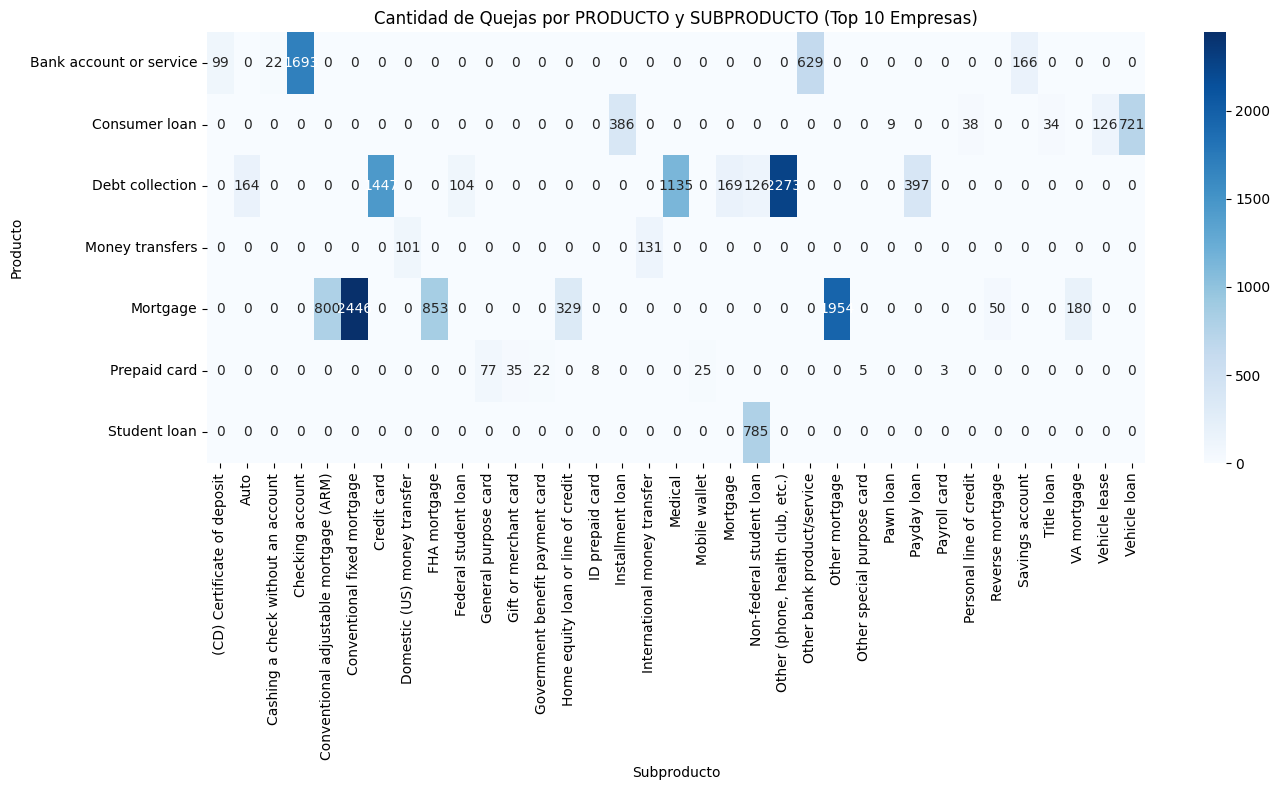

In [206]:
# Total de quejas por producto y subproducto.

top_productos = df['Product'].value_counts().head(10).index
df_top = df[df['Product'].isin(top_productos)]
tabla_quejas = pd.crosstab(df_top['Product'], df_top['Sub-product'])

plt.figure(figsize=(14, 8))
sns.heatmap(tabla_quejas, annot=True, fmt="d", cmap="Blues")
plt.title("Cantidad de Quejas por PRODUCTO y SUBPRODUCTO (Top 10 Empresas)")
plt.xlabel("Subproducto")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Mótivos más frecuentes'}, ylabel='Issue'>

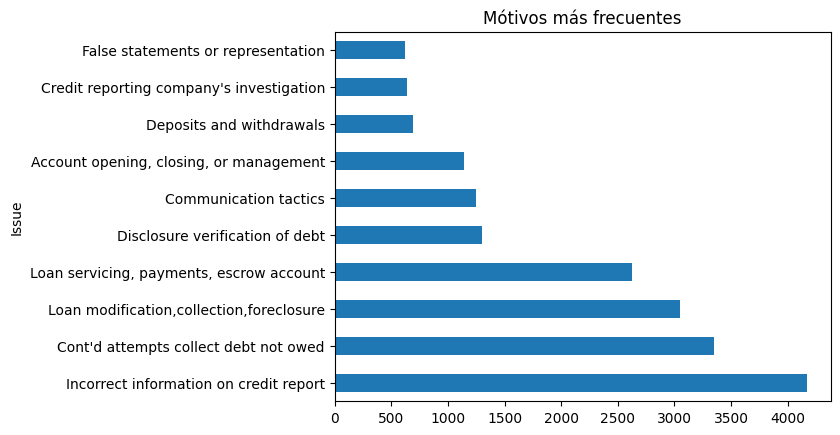

In [207]:
# Por Tema
df['Issue'].value_counts().head(10).plot(kind='barh', title="Mótivos más frecuentes")

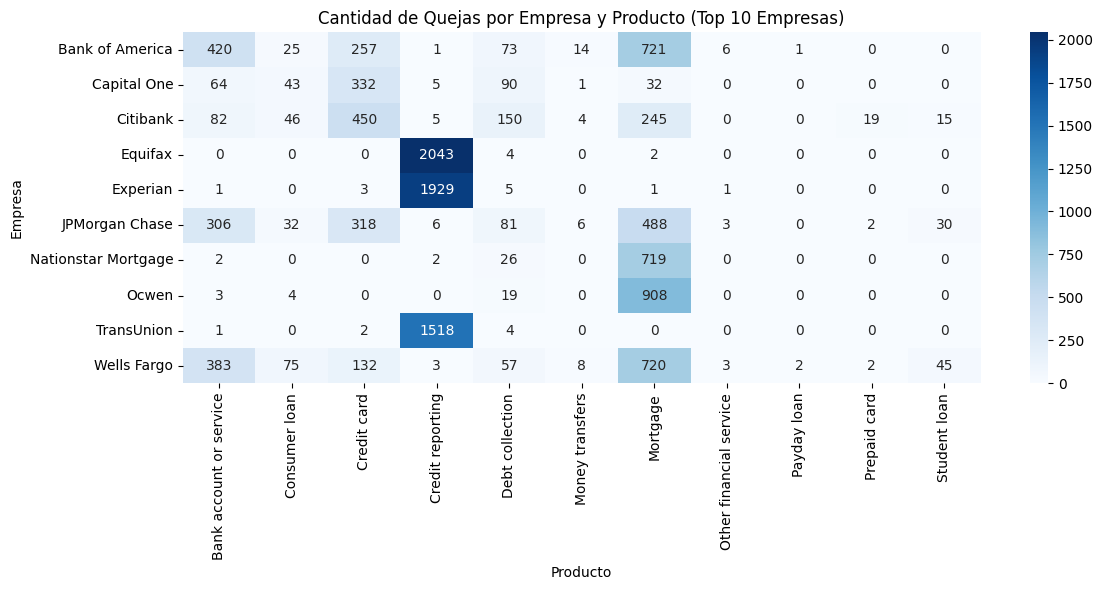

In [208]:
# Total de quejas por empresa y producto

top_empresas = df['Company'].value_counts().head(10).index
df_top = df[df['Company'].isin(top_empresas)]
tabla_quejas = pd.crosstab(df_top['Company'], df_top['Product'])

plt.figure(figsize=(12, 6))
sns.heatmap(tabla_quejas, annot=True, fmt="d", cmap="Blues")
plt.title("Cantidad de Quejas por Empresa y Producto (Top 10 Empresas)")
plt.xlabel("Producto")
plt.ylabel("Empresa")
plt.tight_layout()
plt.show()

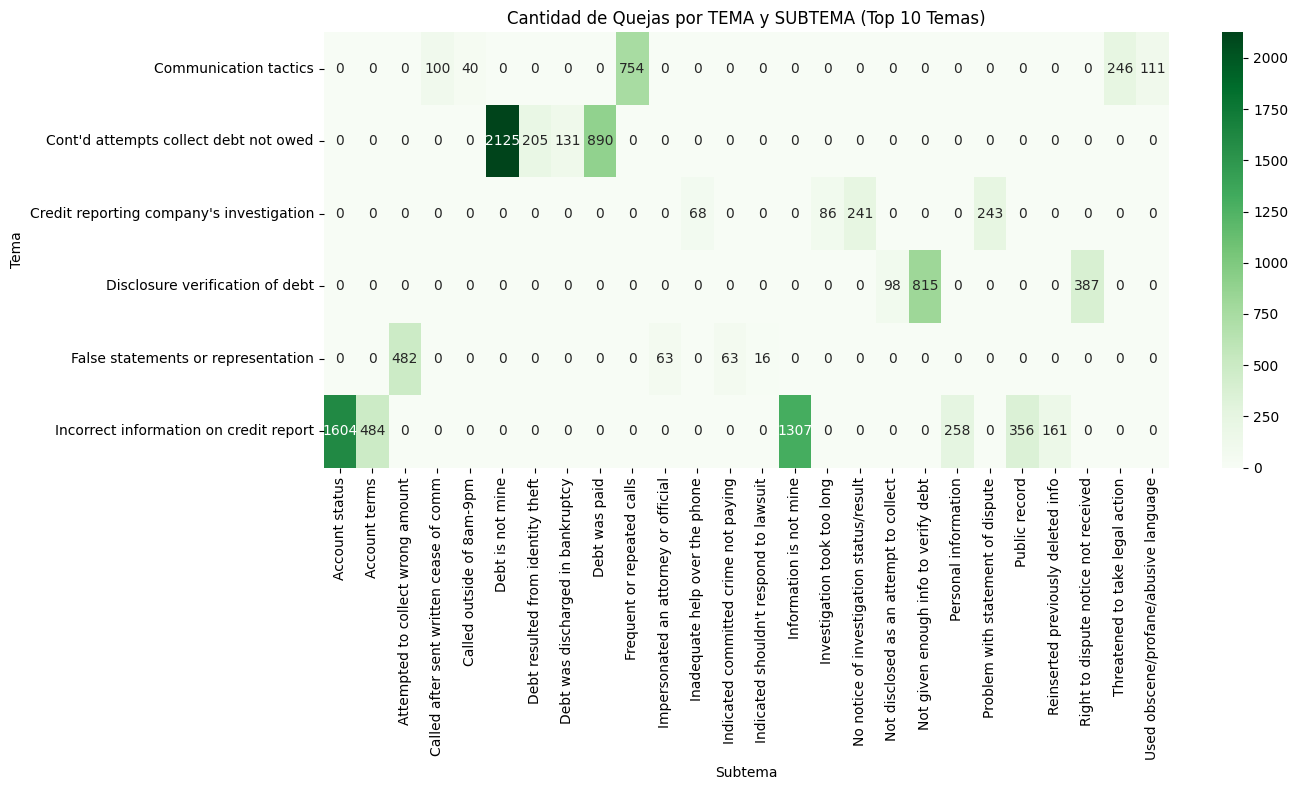

In [209]:
# Por tema y subtema

top_temas = df['Issue'].value_counts().head(10).index
df_top = df[df['Issue'].isin(top_temas)]
tabla_quejas = pd.crosstab(df_top['Issue'], df_top['Sub-issue'])

plt.figure(figsize=(14, 8))
sns.heatmap(tabla_quejas, annot=True, fmt="d", cmap="Greens")
plt.title("Cantidad de Quejas por TEMA y SUBTEMA (Top 10 Temas)")
plt.xlabel("Subtema")
plt.ylabel("Tema")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Estados con más quejas'}, ylabel='State'>

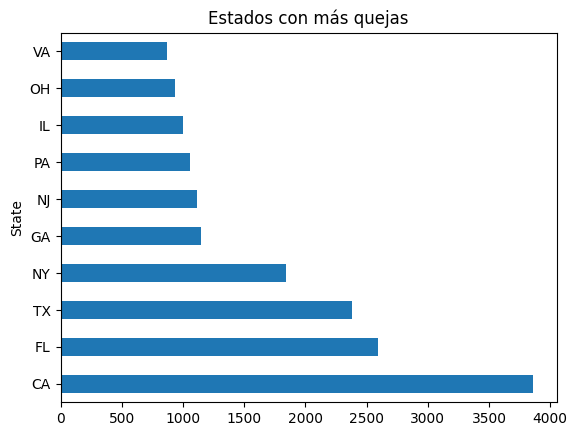

In [210]:
# Por estado.
df['State'].value_counts().head(10).plot(kind='barh', title="Estados con más quejas")

<Axes: title={'center': 'Empresas con más quejas'}, ylabel='Company'>

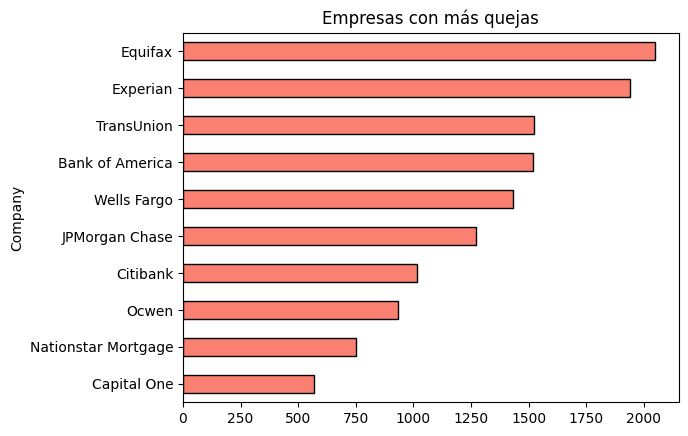

In [211]:
# Por empresa
df['Company'].value_counts().head(10).sort_values().plot(kind='barh', title="Empresas con más quejas", color='salmon',edgecolor='black')

<Axes: title={'center': 'Respuestas a quejas'}, ylabel='Company response'>

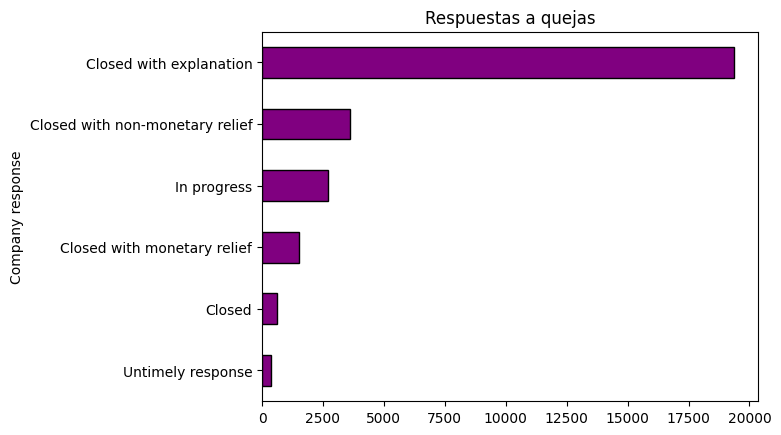

In [212]:
# Por respuesta

df['Company response'].value_counts().head(10).sort_values().plot(kind='barh', title="Respuestas a quejas", color='purple',edgecolor='black')

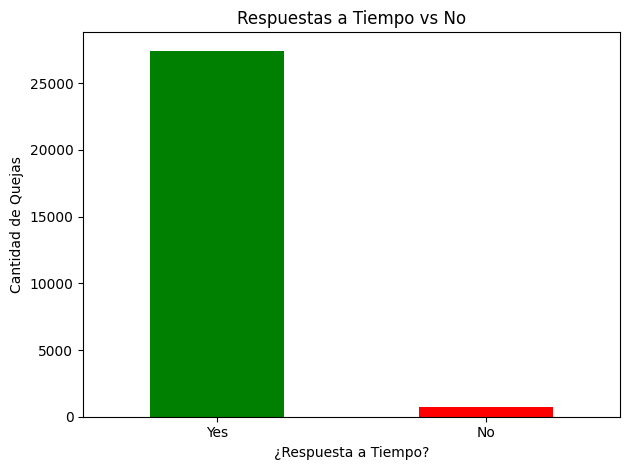

In [213]:
# Quejas respondidas a tiempo.
# Conteo de respuestas
conteo = df['Timely response?'].value_counts()

# Gráfico
conteo.plot(kind='bar', color=['green', 'red'])
plt.title('Respuestas a Tiempo vs No')
plt.xlabel('¿Respuesta a Tiempo?')
plt.ylabel('Cantidad de Quejas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

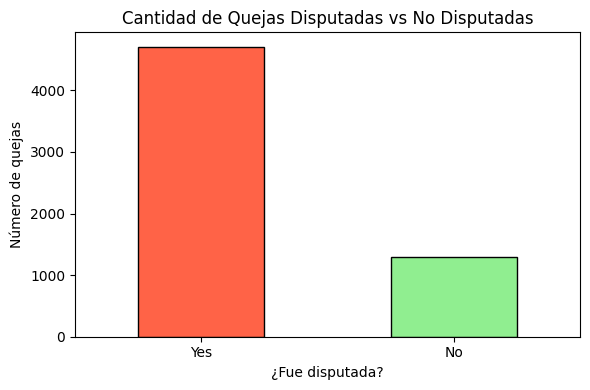

In [214]:
# Quejas disputadas

disputadas = df['Consumer disputed?'].value_counts()


plt.figure(figsize=(6, 4))
disputadas.plot(kind='bar', color=['tomato', 'lightgreen'], edgecolor='black')


plt.title("Cantidad de Quejas Disputadas vs No Disputadas")
plt.xlabel("¿Fue disputada?")
plt.ylabel("Número de quejas")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Análisis de quejas con disputas.

In [215]:
#Total quejas y disputas por producto.

# Agrupar por producto.
resumen_producto = df.groupby('Product').agg(
    total_quejas=('Consumer disputed?', 'count'),
    total_disputas=('Consumer disputed?', lambda x: (x == 'Yes').sum())
).reset_index()

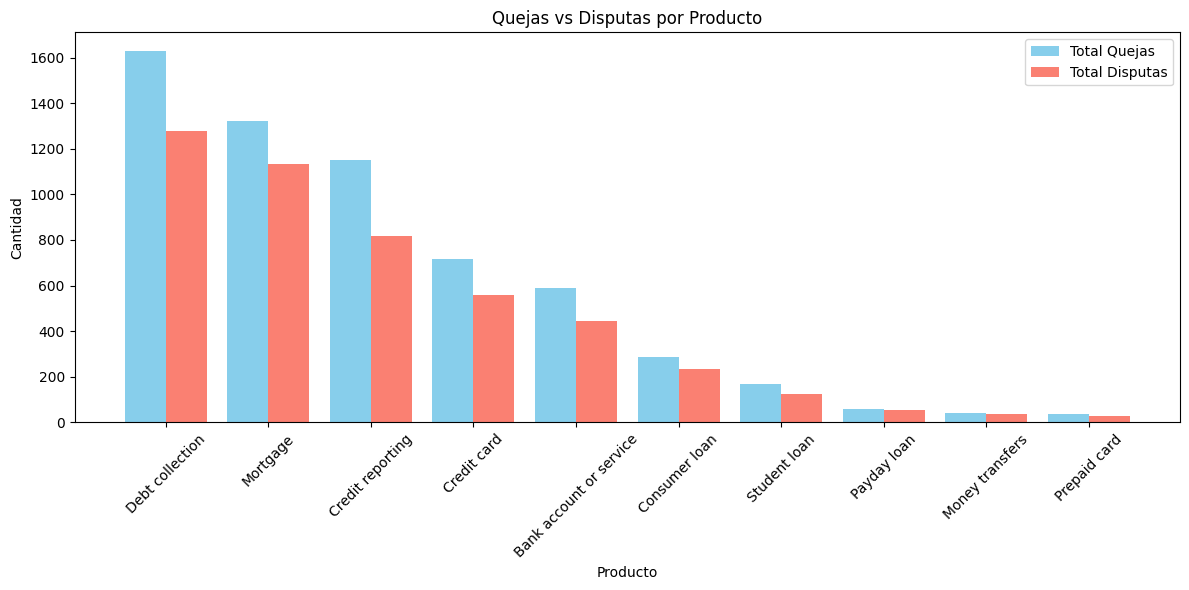

In [216]:
# Ordenar por total de quejas
resumen_producto = resumen_producto.sort_values(by='total_quejas', ascending=False).head(10)

x = np.arange(len(resumen_producto['Product']))
width = 0.4

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, resumen_producto['total_quejas'], width=width, label='Total Quejas', color='skyblue')
plt.bar(x + width/2, resumen_producto['total_disputas'], width=width, label='Total Disputas', color='salmon')

# Etiquetas
plt.xticks(x, resumen_producto['Product'], rotation=45)
plt.title('Quejas vs Disputas por Producto')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.legend()
plt.tight_layout()
plt.show()


In [217]:
#Total quejas y disputas por tema.

# Agrupar por tema
resumen_tema = df.groupby('Issue').agg(
    total_quejas=('Consumer disputed?', 'count'),
    total_disputas=('Consumer disputed?', lambda x: (x == 'Yes').sum())
).reset_index()

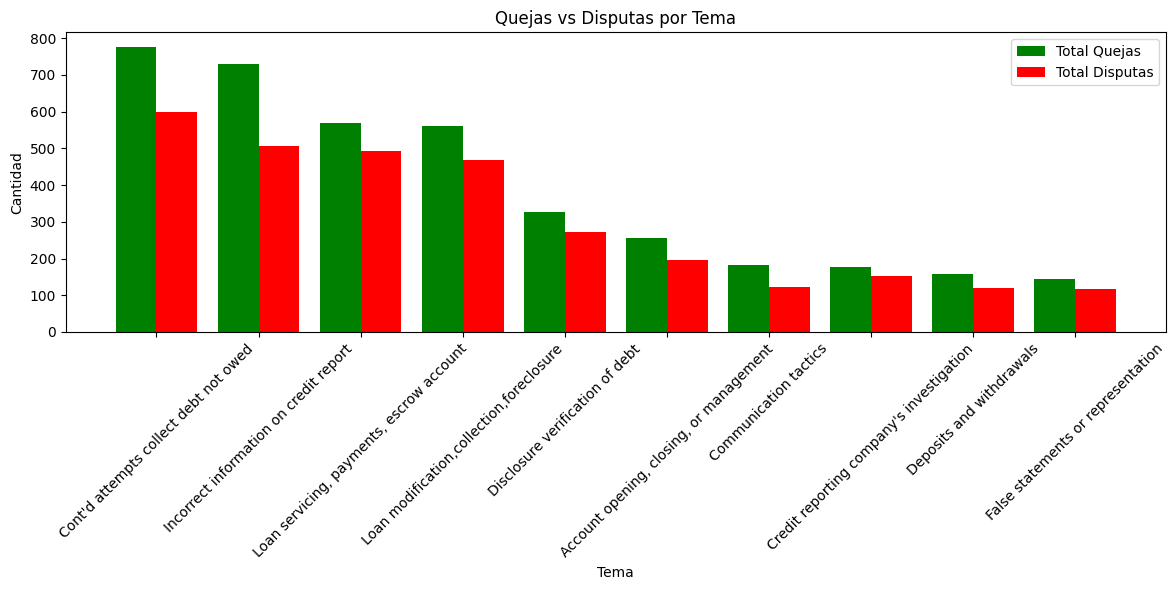

In [218]:
# Ordenar por total de quejas
resumen_tema = resumen_tema.sort_values(by='total_quejas', ascending=False).head(10)

x = np.arange(len(resumen_tema['Issue']))
width = 0.4

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, resumen_tema['total_quejas'], width=width, label='Total Quejas', color='green')
plt.bar(x + width/2, resumen_tema['total_disputas'], width=width, label='Total Disputas', color='red')

# Etiquetas
plt.xticks(x, resumen_tema['Issue'], rotation=45)
plt.title('Quejas vs Disputas por Tema')
plt.xlabel('Tema')
plt.ylabel('Cantidad')
plt.legend()
plt.tight_layout()
plt.show()

In [219]:
#Total quejas y disputas por estado.

# Agrupar por estado
resumen_estado = df.groupby('State').agg(
    total_quejas=('Consumer disputed?', 'count'),
    total_disputas=('Consumer disputed?', lambda x: (x == 'Yes').sum())
).reset_index()


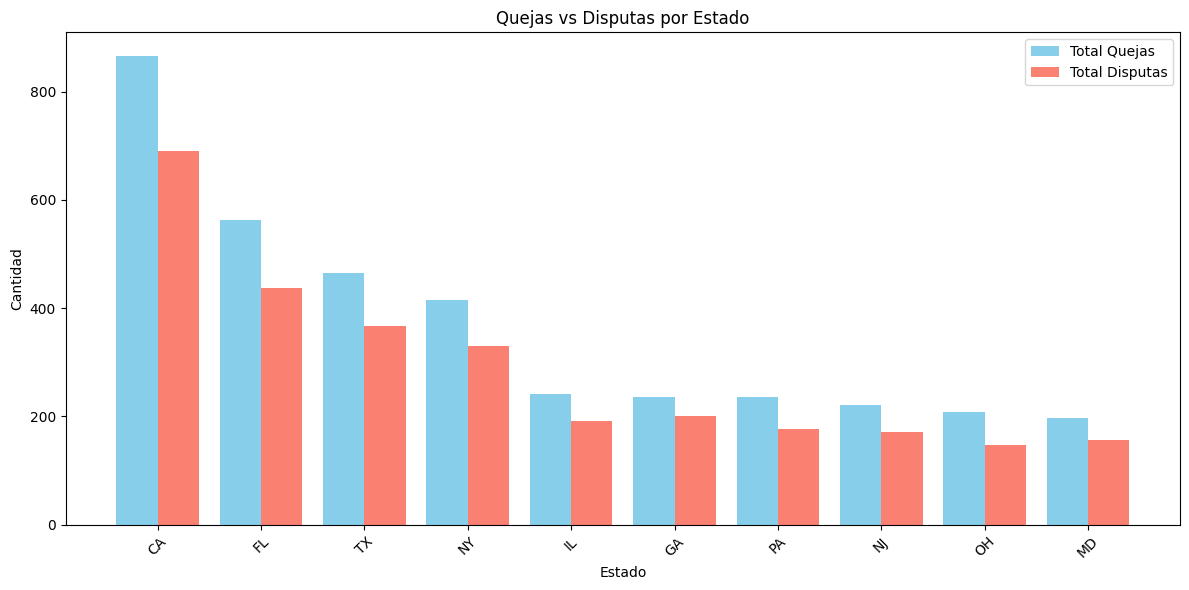

In [220]:
# Ordenar por total de quejas
resumen_estado = resumen_estado.sort_values(by='total_quejas', ascending=False).head(10)

# Posiciones para las barras
x = np.arange(len(resumen_estado['State']))
width = 0.4

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, resumen_estado['total_quejas'], width=width, label='Total Quejas', color='skyblue')
plt.bar(x + width/2, resumen_estado['total_disputas'], width=width, label='Total Disputas', color='salmon')

# Etiquetas
plt.xticks(x, resumen_estado['State'], rotation=45)
plt.title('Quejas vs Disputas por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.legend()
plt.tight_layout()
plt.show()

In [221]:
# Agrupar por empresa
resumen_empresa = df.groupby('Company').agg(
    total_quejas=('Consumer disputed?', 'count'),
    total_disputas=('Consumer disputed?', lambda x: (x == 'Yes').sum())
).reset_index()


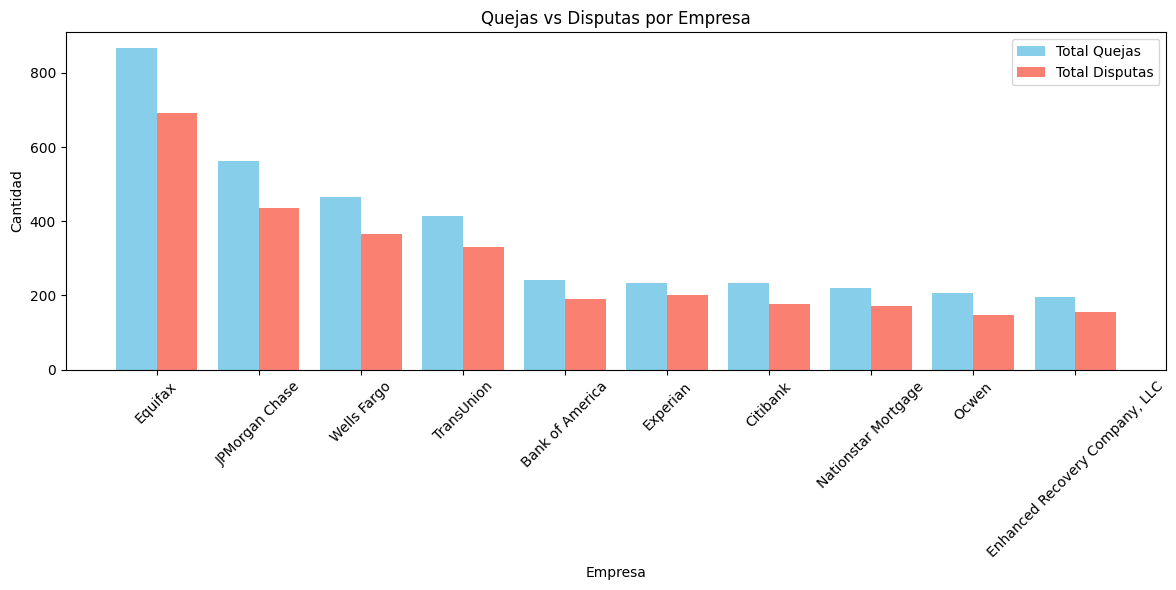

In [222]:
resumen_empresa = resumen_empresa.sort_values(by='total_quejas', ascending=False).head(10)
# Posiciones para las barras
x = np.arange(len(resumen_empresa['Company']))
width = 0.4

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, resumen_estado['total_quejas'], width=width, label='Total Quejas', color='skyblue')
plt.bar(x + width/2, resumen_estado['total_disputas'], width=width, label='Total Disputas', color='salmon')

# Etiquetas
plt.xticks(x, resumen_empresa['Company'], rotation=45)
plt.title('Quejas vs Disputas por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Cantidad')
plt.legend()
plt.tight_layout()
plt.show()

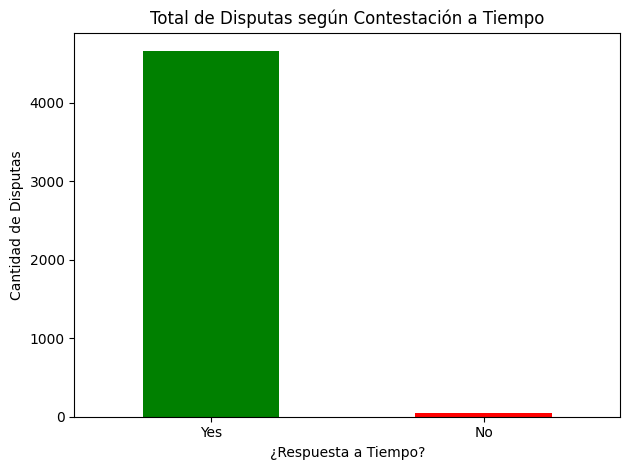

In [223]:
# Total disputas por contestación a tiempo.
df_disputas = df[df['Consumer disputed?'] == 'Yes']
resumen = df_disputas['Timely response?'].value_counts()
resumen.plot(kind='bar', color=['green', 'red'])
plt.title('Total de Disputas según Contestación a Tiempo')
plt.xlabel('¿Respuesta a Tiempo?')
plt.ylabel('Cantidad de Disputas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



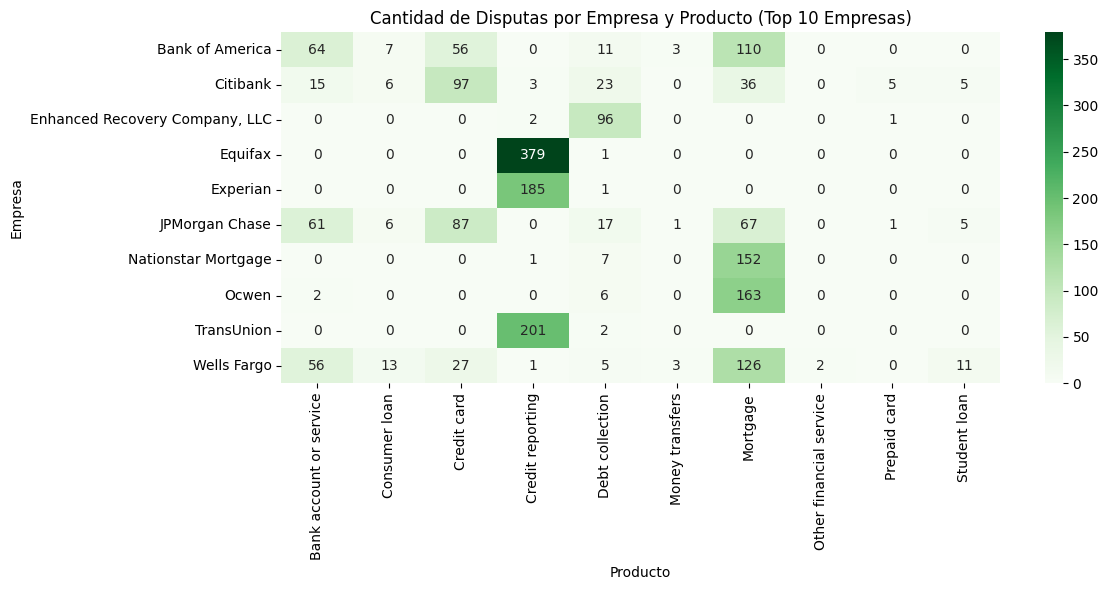

In [224]:
# Total de disputas por empresa y producto

top_empresas = (df[df['Consumer disputed?'] == 'Yes']['Company'].value_counts().head(10).index)

# Tabla cruzada
df_disputas = df[
    (df['Consumer disputed?'] == 'Yes') & (df['Company'].isin(top_empresas))]

tabla_disputas = pd.crosstab(df_disputas['Company'], df_disputas['Product'])


plt.figure(figsize=(12, 6))
sns.heatmap(tabla_disputas, annot=True, fmt="d", cmap="Greens")
plt.title("Cantidad de Disputas por Empresa y Producto (Top 10 Empresas)")
plt.xlabel("Producto")
plt.ylabel("Empresa")
plt.tight_layout()
plt.show()



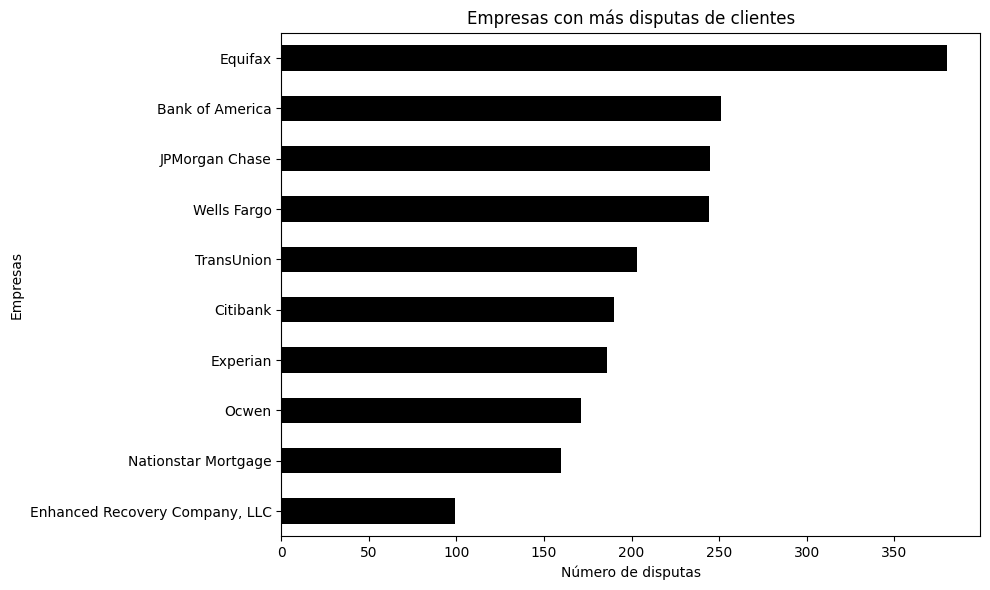

In [225]:
# Agrupación por productos de total de disputas.

df_disputas = df[df['Consumer disputed?']=='Yes']
conteo=df_disputas['Company'].value_counts().head(10)

plt.figure(figsize=(10,6))
conteo.plot(kind="barh", color="black")
plt.xlabel('Número de disputas')
plt.ylabel('Empresas')
plt.title('Empresas con más disputas de clientes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [226]:
# Total de quejas
total_quejas = len(df)

# Total de disputas
total_disputas = len(df_disputas)

# Porcentaje de disputas
porcentaje_disputas = (total_disputas / total_quejas) * 100

print("El porcentaje total de dispustas fue el ", porcentaje_disputas," del total de quejas.")


El porcentaje total de dispustas fue el  16.72112515982384  del total de quejas.


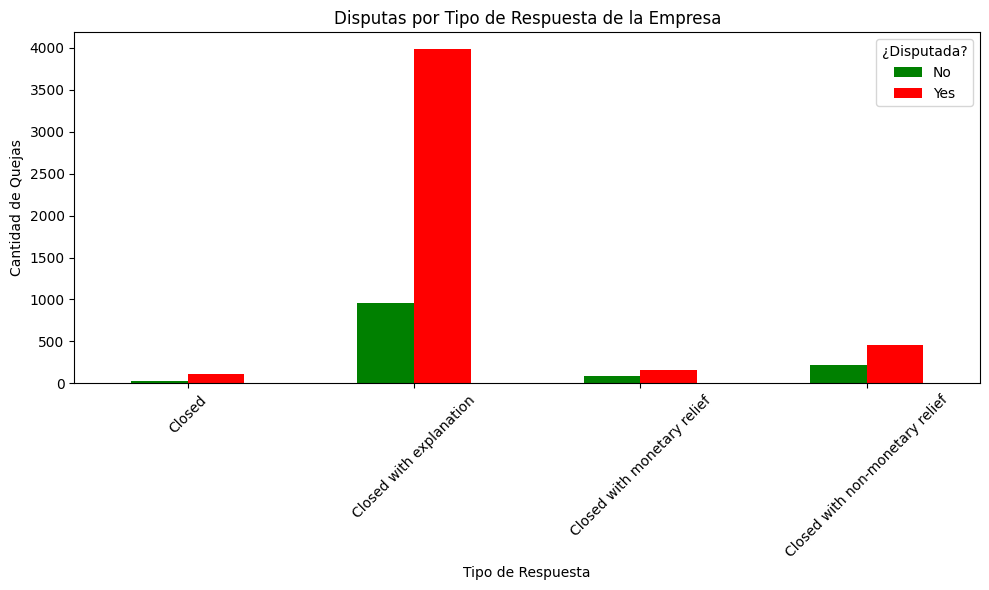

In [227]:
resumen = df.groupby(['Company response', 'Consumer disputed?']).size().unstack(fill_value=0)
resumen.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Disputas por Tipo de Respuesta de la Empresa')
plt.xlabel('Tipo de Respuesta')
plt.ylabel('Cantidad de Quejas')
plt.xticks(rotation=45)
plt.legend(title='¿Disputada?')
plt.tight_layout()
plt.show()


## Preparación para el proyecto.

Después de realizar el análisis del dataframe con información de quejas y disputas. Vamos a analizar los nulos de los datos.

In [228]:
nulos = df.isnull().mean().sort_values(ascending=False)
print("\nPorcentaje de valores nulos por columna:")
display(nulos)


Porcentaje de valores nulos por columna:


Consumer disputed?      0.786688
Sub-issue               0.530793
Sub-product             0.375551
State                   0.014952
ZIP code                0.009945
Issue                   0.000071
Complaint ID            0.000000
Product                 0.000000
Date received           0.000000
Date sent to company    0.000000
Company                 0.000000
Company response        0.000000
Timely response?        0.000000
dtype: float64

Creamos una gráfica para la observación de los datos de la columna <b>Consumer disputed?</b> ya que vemos es una porcentaje alto, un 78%.


Distribución de la variable target:


Consumer disputed?
NaN    22150
Yes     4708
No      1298
Name: count, dtype: int64

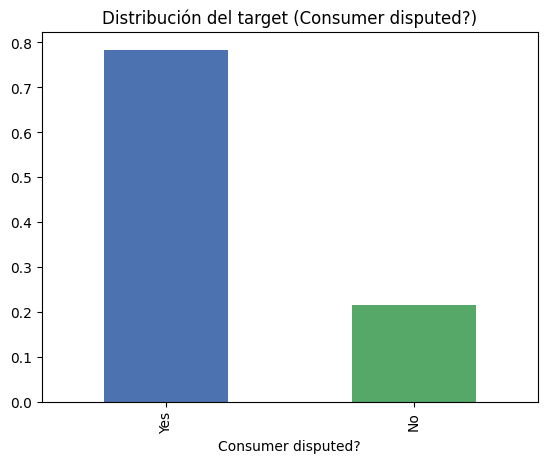

In [229]:
if "Consumer disputed?" in df.columns:
        print("\nDistribución de la variable target:")
        display(df["Consumer disputed?"].value_counts(dropna=False))
        df["Consumer disputed?"].value_counts(normalize=True).plot(
                kind="bar",
                color=["#4c72b0", "#55a868"],
                title="Distribución del target (Consumer disputed?)"
        )
        plt.show()

Vamos a crear un dataframe nuevo con las columnas y datos donde la columna de Consumer Disputed? no sea NaN.

In [230]:
# Dataframe con datos nulos del campo "Consumer disputed?"
df_nonulos = df[~df['Consumer disputed?'].isna()].copy()

In [231]:
df_nonulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Complaint ID          6006 non-null   int64         
 1   Product               6006 non-null   object        
 2   Sub-product           3736 non-null   object        
 3   Issue                 6006 non-null   object        
 4   Sub-issue             2778 non-null   object        
 5   State                 5930 non-null   object        
 6   ZIP code              5963 non-null   float64       
 7   Date received         6006 non-null   datetime64[ns]
 8   Date sent to company  6006 non-null   datetime64[ns]
 9   Company               6006 non-null   object        
 10  Company response      6006 non-null   object        
 11  Timely response?      6006 non-null   object        
 12  Consumer disputed?    6006 non-null   object        
dtypes: datetime64[ns](2), 

Algunos de los campos están sin datos. Vamos a rellenarlos con un dato para poder disponer de los mismo registro. 

In [232]:
for col in ['Sub-product','Sub-issue']:
    df_nonulos[col] = df_nonulos[col].fillna("Unknown").str.lower().str.strip()
df_nonulos["State"] = df_nonulos["State"].fillna("Unknown").astype(str).str.lower().str.strip()




In [233]:
df_nonulos['ZIP code']=df_nonulos['ZIP code'].astype('Int64').astype('string')
df_nonulos['ZIP code']=df_nonulos['ZIP code'].fillna('Unknown')
df_nonulos['Timely response?'] = df_nonulos['Timely response?'].fillna("Unknown").astype(str).str.strip().str.lower()

  

In [234]:
df_nonulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Complaint ID          6006 non-null   int64         
 1   Product               6006 non-null   object        
 2   Sub-product           6006 non-null   object        
 3   Issue                 6006 non-null   object        
 4   Sub-issue             6006 non-null   object        
 5   State                 6006 non-null   object        
 6   ZIP code              6006 non-null   string        
 7   Date received         6006 non-null   datetime64[ns]
 8   Date sent to company  6006 non-null   datetime64[ns]
 9   Company               6006 non-null   object        
 10  Company response      6006 non-null   object        
 11  Timely response?      6006 non-null   object        
 12  Consumer disputed?    6006 non-null   object        
dtypes: datetime64[ns](2), 

In [235]:
# Total de quejas
total_quejas = len(df_nonulos)

# Total de disputas
total_disputas = len(df_disputas)

# Porcentaje de disputas
porcentaje_disputas = (total_disputas / total_quejas) * 100

print("El porcentaje total de disputas fue el ", porcentaje_disputas," del total de quejas.")


El porcentaje total de disputas fue el  78.3882783882784  del total de quejas.


Ya disponemos de un dataframe con la información a trabajar.

Se realiza un análisis exploratorio del nuevo dataframe.

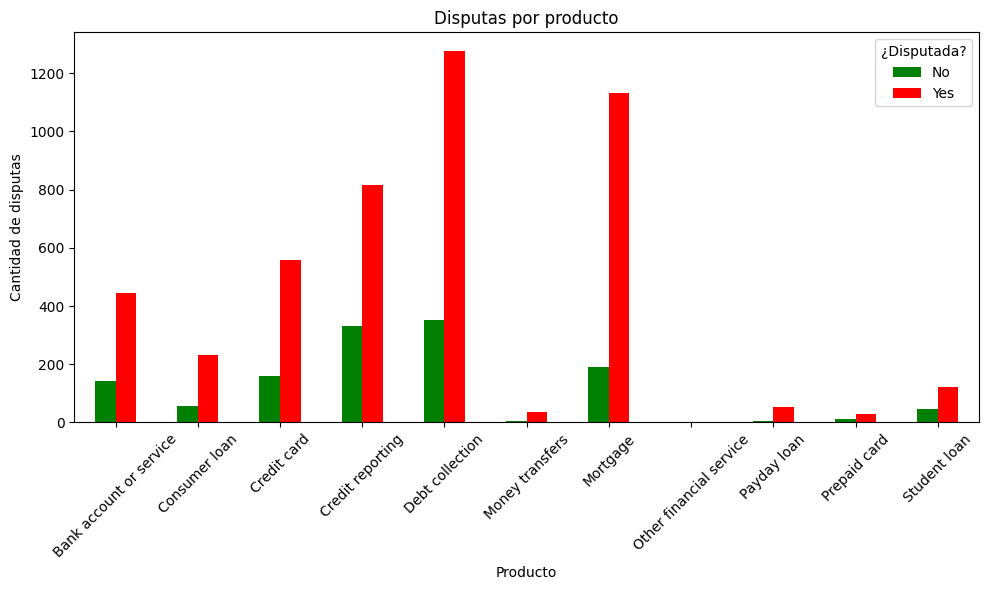

In [236]:
# Por producto

resumen = df_nonulos.groupby(['Product', 'Consumer disputed?']).size().unstack(fill_value=0)
resumen.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Disputas por producto')
plt.xlabel('Producto')
plt.ylabel('Cantidad de disputas')
plt.xticks(rotation=45)
plt.legend(title='¿Disputada?')
plt.tight_layout()
plt.show()

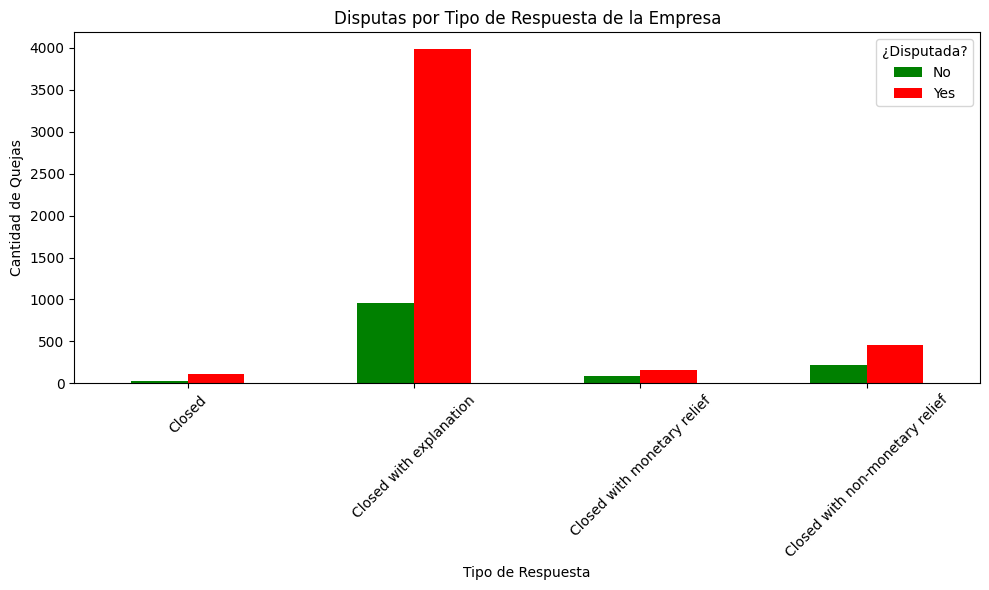

In [237]:
resumen = df_nonulos.groupby(['Company response', 'Consumer disputed?']).size().unstack(fill_value=0)
resumen.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Disputas por Tipo de Respuesta de la Empresa')
plt.xlabel('Tipo de Respuesta')
plt.ylabel('Cantidad de Quejas')
plt.xticks(rotation=45)
plt.legend(title='¿Disputada?')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Mótivos más frecuentes'}, ylabel='Issue'>

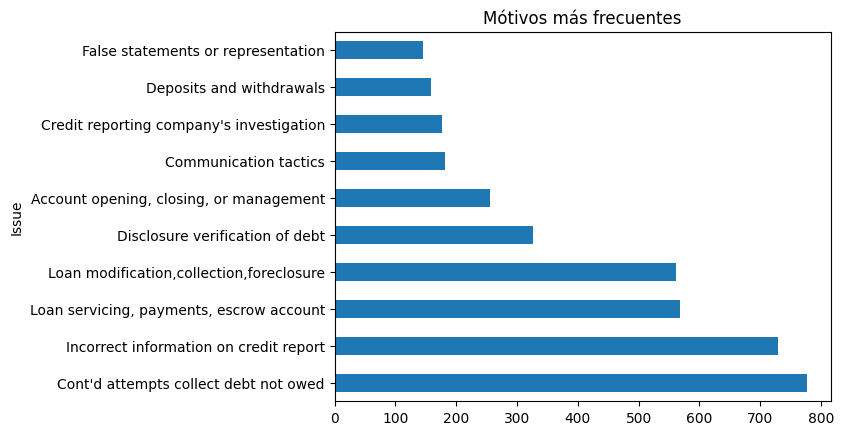

In [238]:
# Por motivo
df_nonulos['Issue'].value_counts().head(10).plot(kind='barh', title="Mótivos más frecuentes")

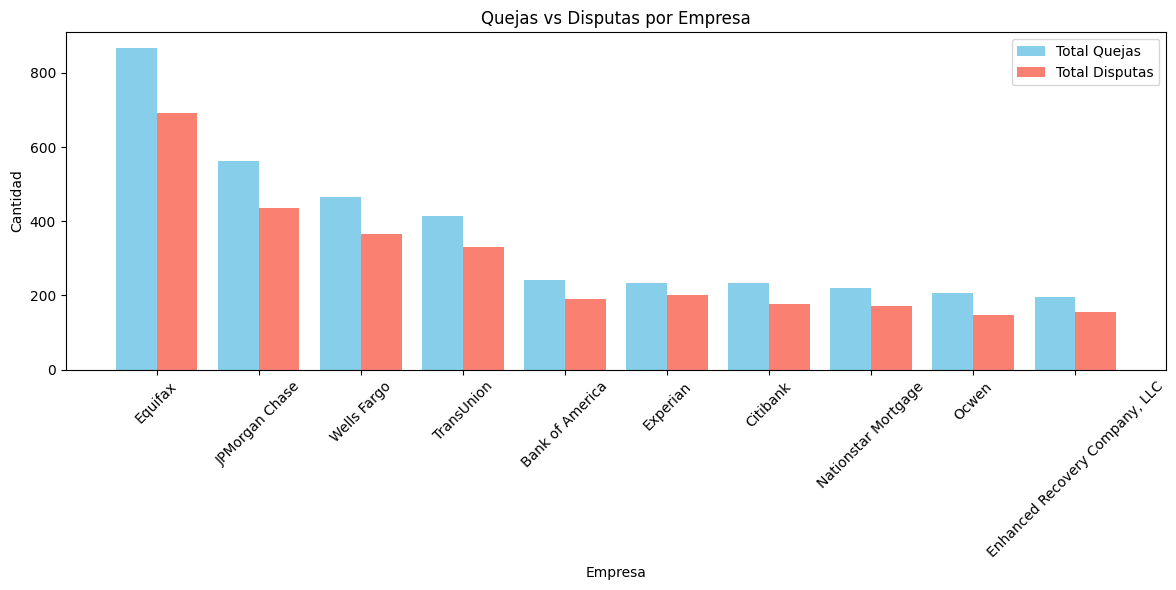

In [239]:
# Por empresa
resumen_empresa = resumen_empresa.sort_values(by='total_quejas', ascending=False).head(10)

# Posiciones para las barras
x = np.arange(len(resumen_empresa['Company']))
width = 0.4

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, resumen_estado['total_quejas'], width=width, label='Total Quejas', color='skyblue')
plt.bar(x + width/2, resumen_estado['total_disputas'], width=width, label='Total Disputas', color='salmon')

# Etiquetas
plt.xticks(x, resumen_empresa['Company'], rotation=45)
plt.title('Quejas vs Disputas por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Cantidad')
plt.legend()
plt.tight_layout()
plt.show()

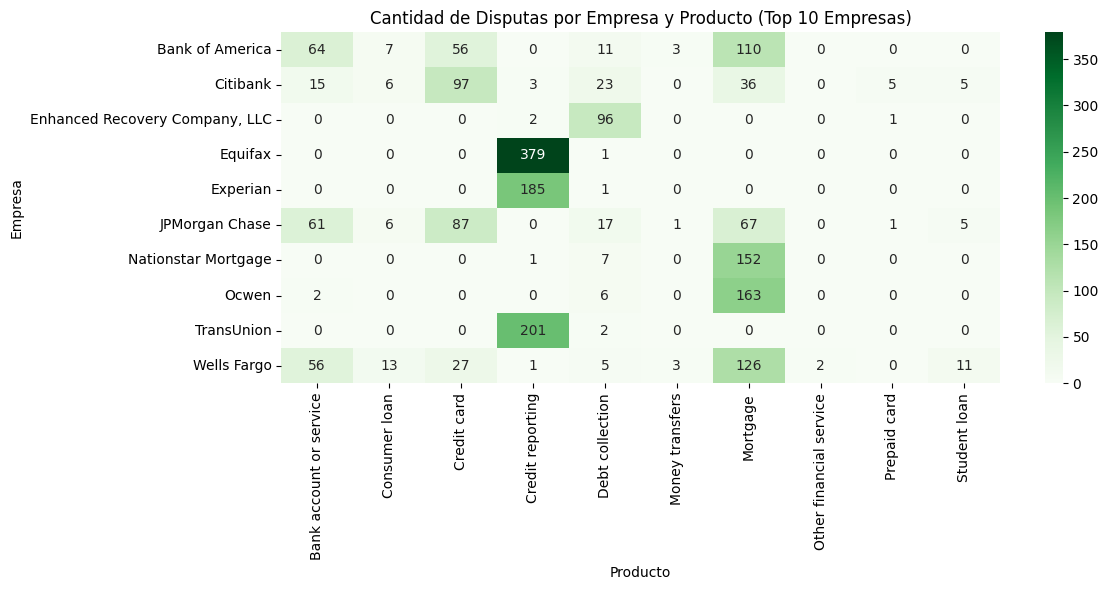

In [240]:
# Total de disputas por empresa y producto

top_empresas = (df_nonulos[df_nonulos['Consumer disputed?'] == 'Yes']['Company'].value_counts().head(10).index)

# Tabla cruzada
df_disputas = df_nonulos[
    (df_nonulos['Consumer disputed?'] == 'Yes') & (df_nonulos['Company'].isin(top_empresas))]

tabla_disputas = pd.crosstab(df_disputas['Company'], df_disputas['Product'])


plt.figure(figsize=(12, 6))
sns.heatmap(tabla_disputas, annot=True, fmt="d", cmap="Greens")
plt.title("Cantidad de Disputas por Empresa y Producto (Top 10 Empresas)")
plt.xlabel("Producto")
plt.ylabel("Empresa")
plt.tight_layout()
plt.show()

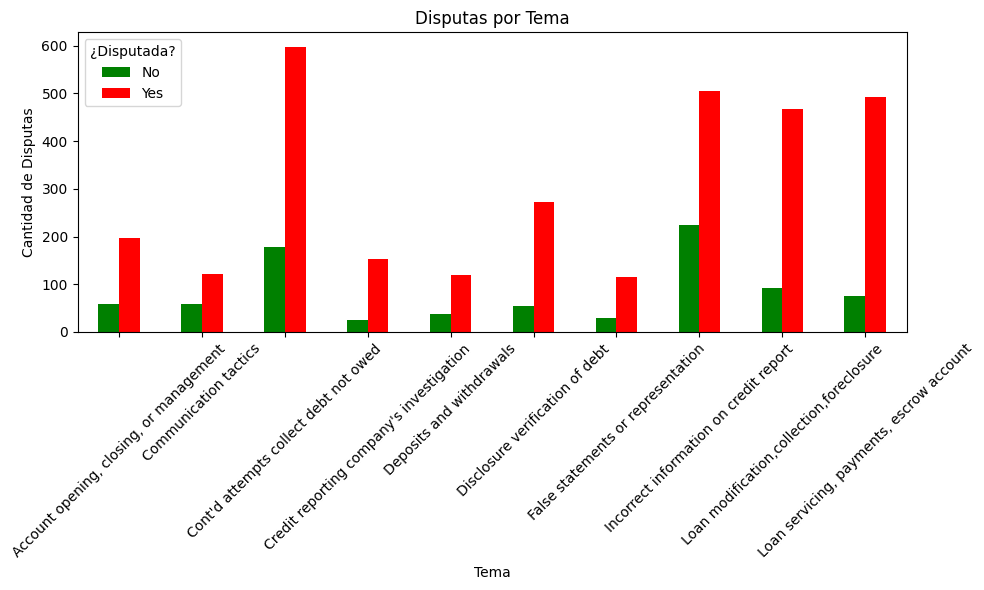

In [241]:
# Disputas por tema.
df_disputas = df_nonulos[df_nonulos['Consumer disputed?'] == 'Yes']
top_issues = df_disputas['Issue'].value_counts().head(10).index
df_top = df_nonulos[df_nonulos['Issue'].isin(top_issues)]

#Agrupar por tema y disputa.
resumen = df_top.groupby(['Issue', 'Consumer disputed?']).size().unstack(fill_value=0)

#Gráfico
resumen.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Disputas por Tema')
plt.xlabel('Tema')
plt.ylabel('Cantidad de Disputas')
plt.xticks(rotation=45)
plt.legend(title='¿Disputada?')
plt.tight_layout()
plt.show()

In [242]:
df_nonulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Complaint ID          6006 non-null   int64         
 1   Product               6006 non-null   object        
 2   Sub-product           6006 non-null   object        
 3   Issue                 6006 non-null   object        
 4   Sub-issue             6006 non-null   object        
 5   State                 6006 non-null   object        
 6   ZIP code              6006 non-null   string        
 7   Date received         6006 non-null   datetime64[ns]
 8   Date sent to company  6006 non-null   datetime64[ns]
 9   Company               6006 non-null   object        
 10  Company response      6006 non-null   object        
 11  Timely response?      6006 non-null   object        
 12  Consumer disputed?    6006 non-null   object        
dtypes: datetime64[ns](2), 

In [243]:
#Pasar a .csv con la transformación.

df_nonulos.to_csv('../data/datos_procesados.csv', index=False, encoding='utf-8')
